In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#image file format support
from PIL import Image

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
data1 = pd.read_csv("fold_1_data.txt",sep = "\t")

In [5]:
total_data = pd.concat([data1], ignore_index=True)
print(data1.shape)
print(total_data.shape)
#print(data2.shape)
#print(data3.shape)
#print(data4.shape)
#print(total_data.shape)

(3730, 12)
(3730, 12)


In [4]:
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,114841417@N06,12068804204_085d553238_o.jpg,481,"(60, 100)",f,1141,780,975,976,0,0,118
1,114841417@N06,12068804204_085d553238_o.jpg,482,"(48, 53)",m,1821,283,969,969,-25,15,35
2,114841417@N06,12078357226_5fdd9367de_o.jpg,483,"(4, 6)",f,1788,341,306,306,-10,0,168
3,114841417@N06,12019067874_0e988248af_o.jpg,483,"(4, 6)",f,3,183,932,777,-115,0,27
4,114841417@N06,12077009614_2490487d2a_o.jpg,484,45,f,258,133,1734,1734,15,0,11


In [9]:
total_data['age'].unique()

array(['(60, 100)', '(48, 53)', '(4, 6)', '45', '13', '(15, 20)', '35',
       '(8, 12)', '23', '55', '(38, 43)', '(25, 32)', '(0, 2)', '22',
       '(38, 42)', 'None', '(8, 23)', '(27, 32)'], dtype=object)

In [13]:
total_data['user_id'].unique()

array(['114841417@N06', '10792106@N03', '20632896@N03', '30872264@N00',
       '28754132@N06', '10001312@N04', '115153697@N06', '10897942@N03',
       '114987449@N03', '10543088@N02', '8034587@N06', '101295462@N02',
       '101071073@N04', '115046815@N06', '82152000@N00', '39615950@N00',
       '10440927@N07', '34350525@N03', '18142498@N06', '10129575@N03',
       '114978798@N03', '37920461@N06', '8072696@N04', '113707938@N08',
       '54263201@N07', '10611527@N03', '115033594@N04', '8200563@N04',
       '39957446@N00', '101636677@N08', '46113291@N03', '35953373@N04',
       '104937236@N08', '37404707@N08'], dtype=object)

In [7]:
total_data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000
mean,621.788472,1037.217426,705.930295,615.257909,612.906971,-18.410188,3.864611,75.364075
std,107.753774,693.173602,419.318655,408.704291,398.354006,75.068704,15.456464,40.248383
min,481.000000,0.000000,0.000000,88.000000,88.000000,-115.000000,-45.000000,5.000000
25%,527.000000,502.000000,379.250000,325.000000,325.000000,-85.000000,0.000000,44.000000
50%,610.000000,963.000000,704.000000,504.000000,504.000000,-10.000000,0.000000,74.000000
75%,700.000000,1474.750000,994.000000,759.000000,759.000000,5.000000,0.000000,103.000000
max,910.000000,7071.000000,2733.000000,3264.000000,2569.000000,285.000000,45.000000,221.000000


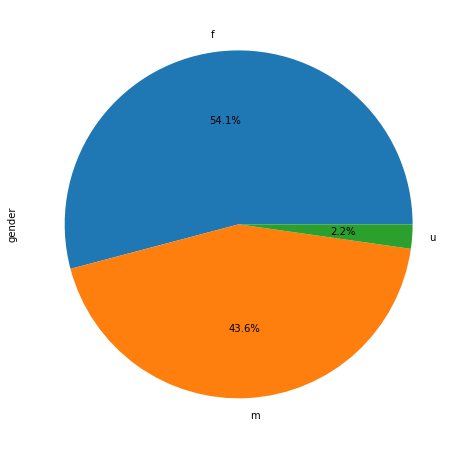

f    1998
m    1611
u      83
Name: gender, dtype: int64

In [8]:
#bar chart
plt.figure(1, figsize=(8,8))
total_data.gender.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
total_data.gender.value_counts()

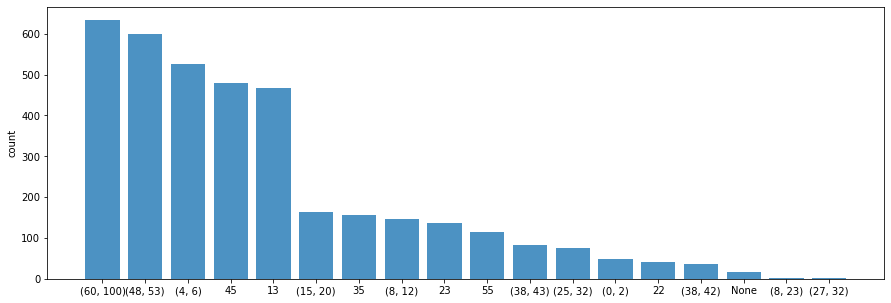

(25, 32)     634
(8, 12)      599
(15, 20)     525
(4, 6)       480
(38, 43)     468
13           164
(60, 100)    156
(48, 53)     146
22           137
35           115
(0, 2)        84
45            75
55            49
23            42
None          37
(38, 42)      17
(27, 32)       1
(8, 23)        1
Name: age, dtype: int64

In [11]:
age = ['(60, 100)', '(48, 53)', '(4, 6)', '45', '13', '(15, 20)', '35',
       '(8, 12)', '23', '55', '(38, 43)', '(25, 32)', '(0, 2)', '22',
       '(38, 42)', 'None', '(8, 23)', '(27, 32)']

plt.figure(figsize=(15, 5))  # width:20, height:3
plt.bar(age, total_data.age.value_counts(), align='center', alpha=0.8)
plt.ylabel('count')
plt.show()
#to Create horizontal bar plot here "plt.barh(labels, values)"

total_data.age.value_counts()

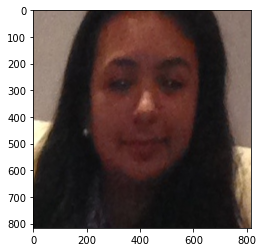

In [14]:
path = "images/"+total_data.user_id.loc[8]+"/landmark_aligned_face."+str(total_data.face_id.loc[8])+"."+total_data.original_image.loc[8]
img = load_img(path)
plt.imshow(img)
plt.show()

### Generate dataframe¶